In [1]:
%matplotlib notebook

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import emoji
import contractions

nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Error loading words: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_pickle('labeled_data.p')

In [3]:
len(df)

24783

### Distribution of the Number of Annotators

<IPython.core.display.Javascript object>


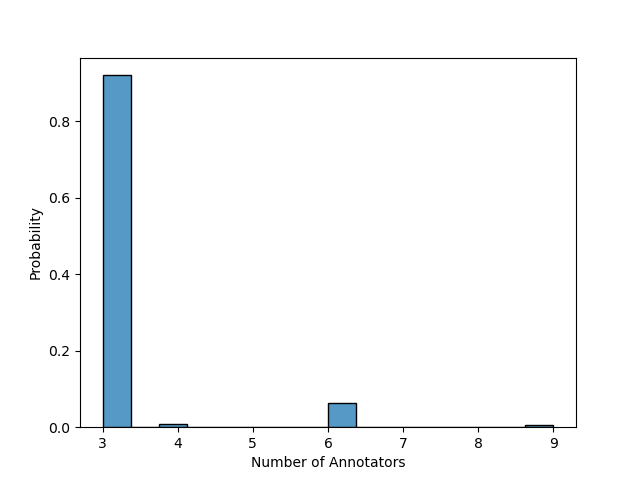

In [4]:
plt.figure(1)
sns.histplot(x=df['count'],stat='probability')
plt.xlabel('Number of Annotators')
plt.show()

### Distribution for Each Class

In [5]:
conditions = [
    (df['class'] == 0),
    (df['class'] == 1),
    (df['class'] == 2),
    
    ]

values = ['hate_speech','offensive_language','neither']

df['class label'] = np.select(conditions, values)


<IPython.core.display.Javascript object>


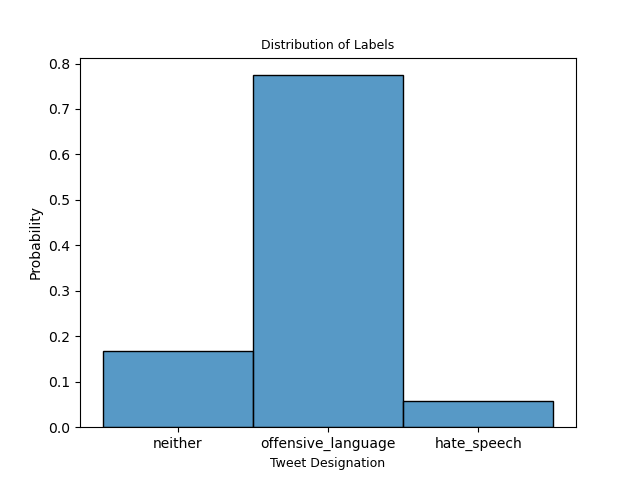

In [6]:
plt.figure(2)
p = sns.histplot(x=df['class label'],stat='probability',)
plt.title('Distribution of Labels',size=9)
plt.xlabel('Tweet Designation',size=9)
plt.show()

### Consensus Per Class

#### Neither

In [7]:
df_neither = df[df['class label']=='neither']

df_neither['neither consensus'] = df_neither["neither"]/df_neither["count"]

df_neither.head()

<ipython-input-7-feaaddffa619>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neither['neither consensus'] = df_neither["neither"]/df_neither["count"]


,count,hate_speech,offensive_language,neither,class,tweet,class label,neither consensus
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither,1.000000
40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """,neither,0.666667
63,3,0,0,3,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",neither,1.000000
66,3,0,1,2,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",neither,0.666667
67,3,0,1,2,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",neither,0.666667


<IPython.core.display.Javascript object>


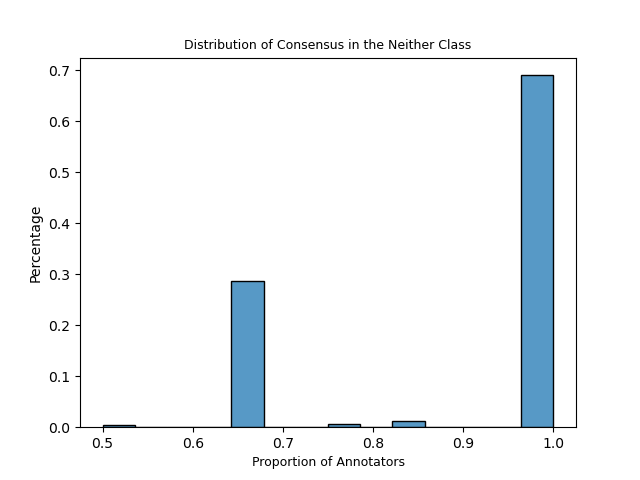

In [8]:
plt.figure(3)
p =sns.histplot(x=df_neither['neither consensus'],stat='probability')
plt.title('Distribution of Consensus in the Neither Class',size=9)
plt.xlabel('Proportion of Annotators',size=9)
plt.ylabel('Percentage')
plt.savefig('Distribution of Consensus in the Neither Class.png')
plt.show()

##### Understand Where the Disagreement Lies

This is a function of how the data was collected and will show which class the annotators struggled with the most

In [9]:
df_neither[df_neither['neither consensus']<1][['hate_speech','offensive_language']].sum()

hate_speech            262
offensive_language    1100
dtype: int64

In [10]:
df_neither[(df_neither['neither consensus']<1) & (df_neither['hate_speech']!=0)][['hate_speech','offensive_language']].sum()

hate_speech           262
offensive_language     38
dtype: int64

In [11]:
df_neither[(df_neither['neither consensus']<1) & (df_neither['offensive_language']!=0)][['hate_speech','offensive_language']].sum()

hate_speech             34
offensive_language    1100
dtype: int64

#### hate speech 

In [12]:
df_hate = df[df['class label']=='hate_speech']

df_hate['hate speech consensus'] = df_hate['hate_speech']/df_hate["count"]

df_hate.head()

<ipython-input-12-c772418d5c4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hate['hate speech consensus'] = df_hate['hate_speech']/df_hate["count"]


,count,hate_speech,offensive_language,neither,class,tweet,class label,hate speech consensus
85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",hate_speech,0.666667
90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",hate_speech,1.000000
111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",hate_speech,1.000000
186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",hate_speech,1.000000
204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...",hate_speech,0.666667


In [20]:
df_hate[df_hate['hate speech consensus']<=0.5].to_excel('Hate Speech Unconsensus.xlsx') # Understand how consensus <= 0.5 and can be hate speech. 

<IPython.core.display.Javascript object>


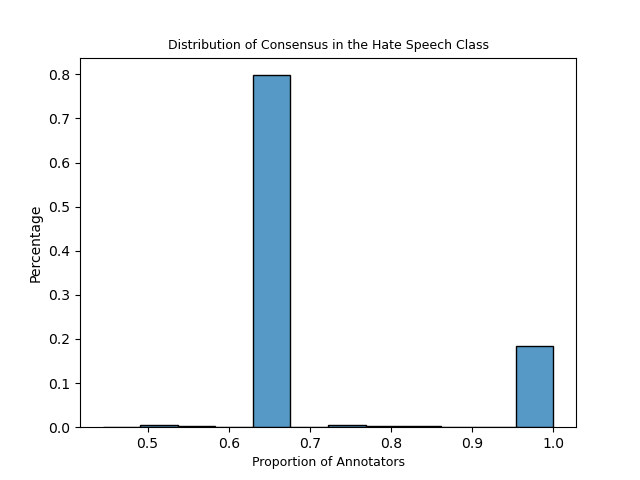

In [14]:
plt.figure(4)
p =sns.histplot(x=df_hate['hate speech consensus'],stat='probability')
plt.title('Distribution of Consensus in the Hate Speech Class',size=9)
plt.xlabel('Proportion of Annotators',size=9)
plt.ylabel('Percentage')
plt.savefig('Distribution of Consensus in the Hate Speech Class.png')
plt.show()

#### Understand where the disagreement lies

In [15]:
df_hate[df_hate['hate speech consensus']<1][['neither','offensive_language']].sum()

neither                137
offensive_language    1081
dtype: int64

In [16]:
df_hate[(df_hate['hate speech consensus']<1) & (df_hate['offensive_language']!=0)][['neither','offensive_language']].sum()

neither                 15
offensive_language    1081
dtype: int64

In [17]:
df_hate[(df_hate['hate speech consensus']<1) & (df_hate['neither']!=0)][['neither','offensive_language']].sum()

neither               137
offensive_language     17
dtype: int64

#### Offensive Language 

In [18]:
df_offensive = df[df['class label']=='offensive_language']

df_offensive['offensive language consensus'] = df_offensive['offensive_language']/df_offensive["count"]

df_offensive.head()

<ipython-input-18-7aabfbf88571>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offensive['offensive language consensus'] = df_offensive['offensive_language']/df_offensive["count"]


,count,hate_speech,offensive_language,neither,class,tweet,class label,offensive language consensus
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language,1.000000
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language,1.000000
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language,0.666667
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language,1.000000
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",offensive_language,0.666667


<IPython.core.display.Javascript object>


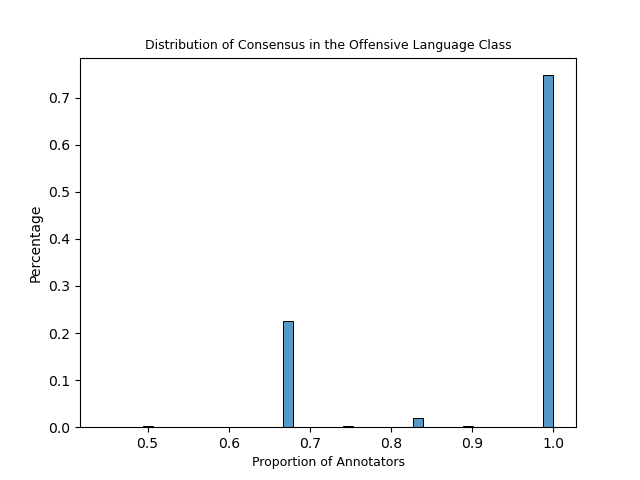

In [19]:
plt.figure(5)
p =sns.histplot(x=df_offensive['offensive language consensus'],stat='probability')
plt.title('Distribution of Consensus in the Offensive Language Class',size=9)
plt.xlabel('Proportion of Annotators',size=9)
plt.ylabel('Percentage')
plt.savefig('Distribution of Consensus in the Offensive Language Class.png')
plt.show()

####  Understand where the disagreement lies

In [20]:
df_offensive[df_offensive['offensive language consensus']<1][['neither','hate_speech']].sum()

neither        1629
hate_speech    3463
dtype: int64

In [21]:
df_offensive[(df_offensive['offensive language consensus']<1) & (df_offensive['neither']!=0)][['neither','hate_speech']].sum()

neither        1629
hate_speech      95
dtype: int64

In [22]:
df_offensive[(df_offensive['offensive language consensus']<1) & (df_offensive['hate_speech']!=0)][['neither','hate_speech']].sum()

neither          82
hate_speech    3463
dtype: int64

### Clean Data Set

In [23]:
def cleaner(tweet):
    
    space_pattern = '\s+'
    
    tweet = re.sub(space_pattern, ' ', tweet) # Get rid of a lot of white space
    
    tweet = re.sub("#[\w\-]+","HASHTAGEHERE",tweet) #Remove @ sign
    
    tweet = re.sub("@[\w\-]+","MENTIONHERE",tweet) #Remove @ sign
    
    tweet = re.sub("&[\w\-]+"," ",tweet) #Remove & sign
    
    tweet = re.sub("RT","RETWEET",tweet) # rename retweet
    
    tweet = contractions.fix(tweet) # fix contractions
    
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    
    tweet = " ".join(tweet.split())
    
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    
    tweet = tweet.replace(";", " ") # remove ; and place a space 
    
    tweet = tweet.replace("..", " ") # remove .. and place a space 
    
    tweet = tweet.replace('  ','')
    

    return tweet

# def preprocess(text_string):
#     """
#     Accepts a text string and replaces:
#     1) urls with URLHERE
#     2) lots of whitespace with one instance
#     3) mentions with MENTIONHERE

#     This allows us to get standardized counts of urls and mentions
#     Without caring about specific people mentioned
#     """
#     space_pattern = '\s+'
#     giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
#     mention_regex = '@[\w\-]+'
#     parsed_text = re.sub(space_pattern, ' ', text_string)
#     parsed_text = re.sub(giant_url_regex, '', parsed_text)
#     parsed_text = re.sub(mention_regex, '', parsed_text)
#     #parsed_text = parsed_text.code("utf-8", errors='ignore')
#     return parsed_text


df['tweet_processed'] = df['tweet'].map(lambda x: cleaner(x))

df['tweet_processed'] = df['tweet_processed'].str.lower()

In [24]:
df.to_csv('processed_tweets.csv') # For modeling

In [25]:
# spec_chars = ["!",'"',"#","%","&","'","(",")",
#               "*","+",",","-",".","/",":",";","<",
#               "=",">","?","@","[","\\","]","^","_",
#               "`","{","|","}","~","–","0","1","2","3","4","5","6","7","8","9"]

# for char in spec_chars:
#     df['tweet_processed'] = df['tweet_processed'].str.replace(char, ' ')

<ipython-input-25-b4a74f054d9c>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['tweet_processed'] = df['tweet_processed'].str.replace(char, ' ')


In [26]:
# def consensus(sourceDF,label):
    
#     sourceDF = sourceDF
    
#     other_labels = ['offensive_language','hate_speech','neither']
    
#     other_labels.remove(label)
    
#     df_con = sourceDF[sourceDF['class label']==label]
    
#     df_con['%s_consensus'%label] = df_con[label]/df_con["count"]
    
#     df_1 = df_con[df_con['%s_consensus'%label]<1][['tweet_processed']]
    
#     df_2 = df_con[ (df_con['%s_consensus'%label]<1) & (df_con[other_labels[0]]!=0)][['tweet_processed']]
    
#     df_3 = df_con[ (df_con['%s_consensus'%label]<1) & (df_con[other_labels[1]]!=0)][['tweet_processed']]
    
#     df_con = df_con[['tweet_processed']]
    
#     return df_con,df_1,[df_2,other_labels[0]],[df_3,other_labels[1]]

In [27]:
# for i in ['offensive_language','hate_speech','neither']:
    
#     # Get all entites belonging to the class i
#     consensus(df,i)[0].to_csv('%s_consensus.csv'%i)
    
#     # Get all entities with consensus < 1 for class i
#     consensus(df,i)[1].to_csv('%s_no_consensus_total.csv'%i)
    
#     # Get subset of entities < 1 that were some thought were the first of the other labels
#     first_subset = consensus(df,i)[2]
    
#     first_subset[0].to_csv('%s_no_consensus_%s_focused.csv'%(i,first_subset[1]))
                           
#     # Get subset of entities < 1 that were some thought were the second of the other labels
                           
#     second_subset = consensus(df,i)[3]
    
#     second_subset[0].to_csv('%s_no_consensus_%s_focused.csv'%(i,second_subset[1]))

<ipython-input-26-ca880448a1e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['%s_consensus'%label] = df_con[label]/df_con["count"]
<ipython-input-26-ca880448a1e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['%s_consensus'%label] = df_con[label]/df_con["count"]
<ipython-input-26-ca880448a1e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt